### Logistic Regression

### Import required libraries

In [11]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

### Read, preprocess, and print the main statistics about the dataset

In [12]:
# read the dataset
df = pd.read_csv("C:/Users/29vai/penguins.csv")

# Data cleaning- drop rows with missing values
df = df.dropna()

# describe dataframe statistical values
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Normalize categorical features

In [13]:
# Convert string features to categorical features
df['island'] = pd.Categorical(df['island']).codes
df['sex'] = pd.Categorical(df['sex']).codes
df['species'] = pd.Categorical(df['species']).codes
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


### Normalize non-categorical features

In [14]:
# find the min and max values for each column
min_vals1 = df["bill_length_mm"].min()
max_vals1 = df["bill_length_mm"].max()

min_vals2 = df["bill_depth_mm"].min()
max_vals2 = df["bill_depth_mm"].max()

min_vals3 = df["flipper_length_mm"].min()
max_vals3 = df["flipper_length_mm"].max()

min_vals4 = df["body_mass_g"].min()
max_vals4 = df["body_mass_g"].max()

df["bill_length_mm"] = (df["bill_length_mm"] - min_vals1) / (max_vals1 - min_vals1)
df["bill_depth_mm"] = (df["bill_depth_mm"] - min_vals2) / (max_vals2 - min_vals2)
df["flipper_length_mm"] = (df["flipper_length_mm"] - min_vals3) / (max_vals3 - min_vals3)
df["body_mass_g"] = (df["body_mass_g"] - min_vals4) / (max_vals4 - min_vals4)

### Selecting features

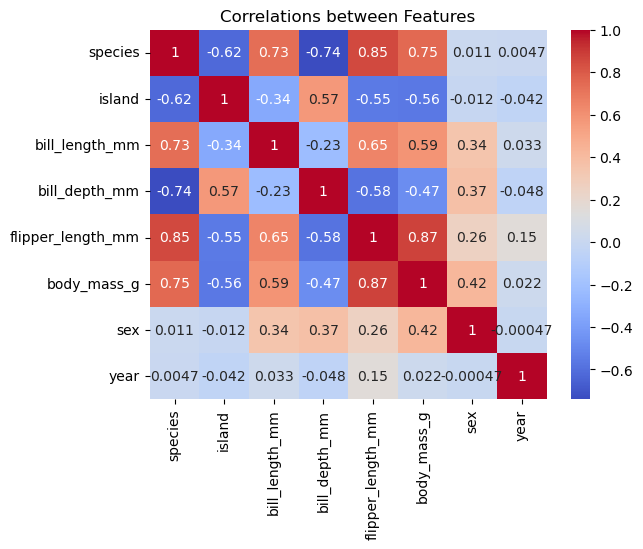

In [15]:
# Plot heatmap 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlations between Features')
plt.show()


### Selected target Y is "sex" 

###  Created data matrices for input and target with selected features

In [16]:
# Selected features in X and selected target in y
X = df.drop(columns=["sex","year","island"]).values
y = df["sex"].values.reshape(-1, 1)

### Dataset divided into training and test, as 80% training, 20% testing dataset

In [17]:
# Divide the dataset into training and test
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Logistic regression defined by below code

In [18]:
w = np.random.uniform(0, 1)

# Define logistic regression class
class LogitRegression():
    def __init__(self, learning_rate=0.01, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, X, y, w, b):
        N = len(X)
        h = self.sigmoid(np.dot(X, w) + b)
        return (-1 / N) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, y, w, b):
        N = len(X)
        h = self.sigmoid(np.dot(X,w) + b)
        dW = (1 / N) * np.dot(X.T, (h - y))
        dB = (1 / N) * np.sum(h - y)
        return dW, dB

    def fit(self, X, y):
        self.loss = []
        w = np.random.uniform(0, 1, (X.shape[1], 1))
        b = np.random.uniform(0, 1)
        for i in range(self.iterations):
            dW, dB = self.gradient_descent(X, y, w, b)
            w -= self.learning_rate * dW
            b -= self.learning_rate * dB
            self.loss.append(self.cost(X, y, w, b))
        self.w = w
        self.b = b
    
    def loss (self, X, y):
        self.loss = []
        w = np.random.uniform(0, 1, (X.shape[1], 1))
        b = np.random.uniform(0, 1)
        for i in range(self.iterations):
            dW, dB = self.gradient_descent(X, y, w, b)
            w -= self.learning_rate * dW
            b -= self.learning_rate * dB
            loss= self.loss.append(self.cost(X, y, w, b))
        self.w = w
        self.b = b
    
    def loss(self, X, y):
        loss_value = []
        w = np.random.uniform(0, 1, (X.shape[1], 1))
        b = np.random.uniform(0, 1)
        for i in range(self.iterations):
            dW, dB = self.gradient_descent(X, y, w, b)
            w -= self.learning_rate * dW
            b -= self.learning_rate * dB
            loss = self.cost(X, y, w, b)
            loss_value.append(loss)
        return loss

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
        return (y_pred >= 0.5).astype(int)

### Training model

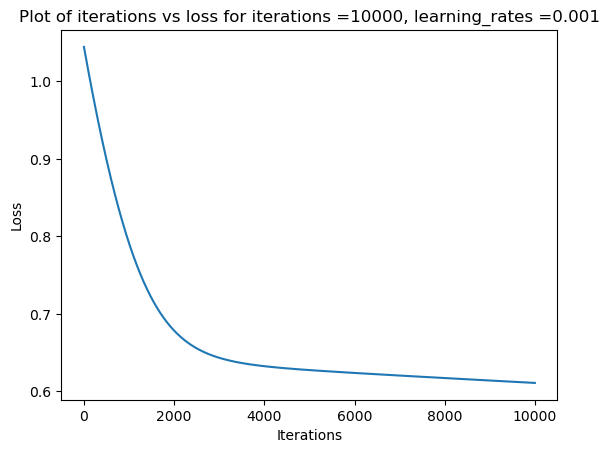

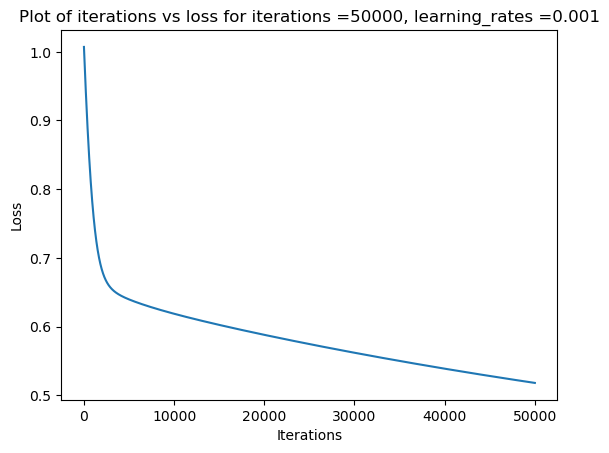

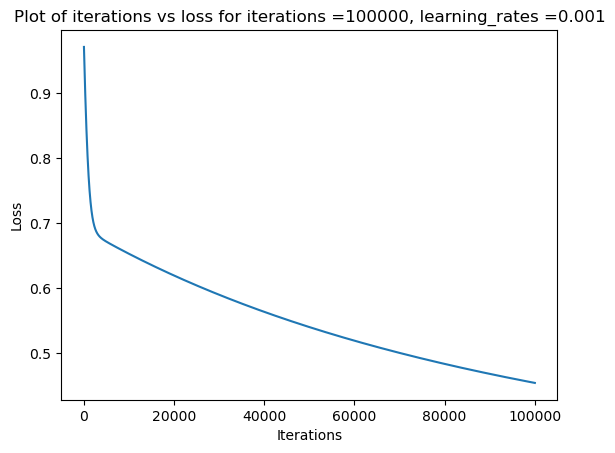

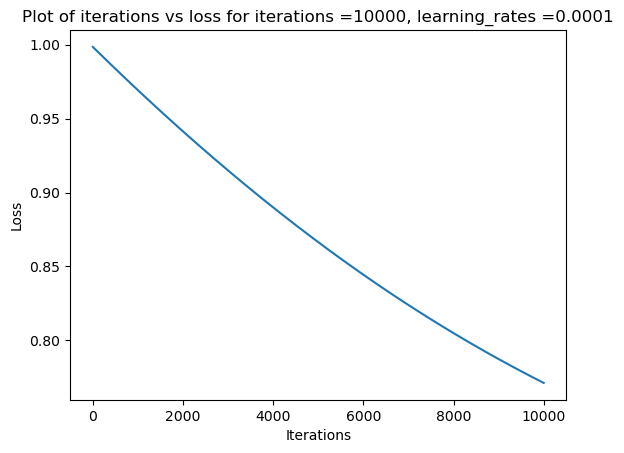

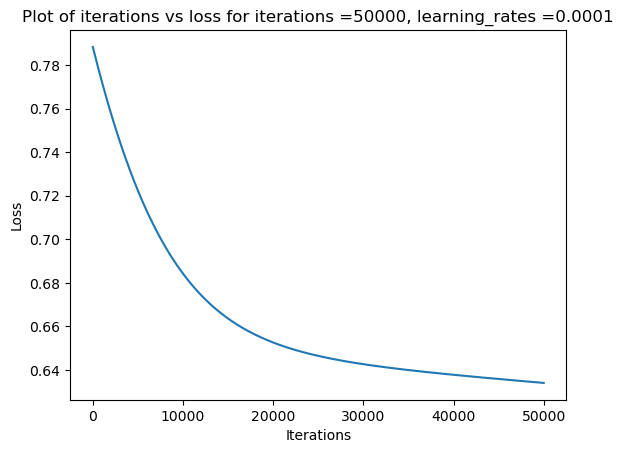

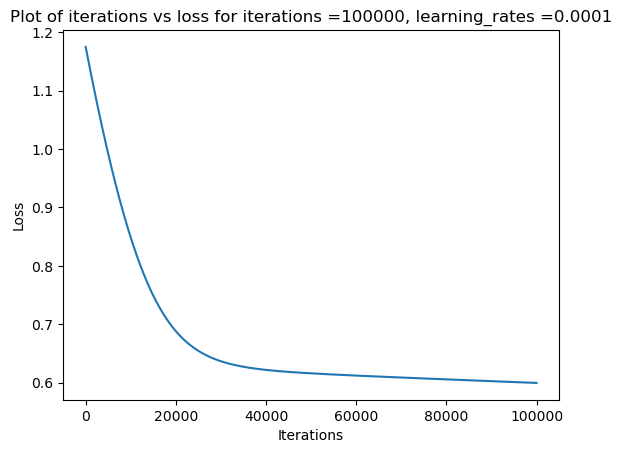

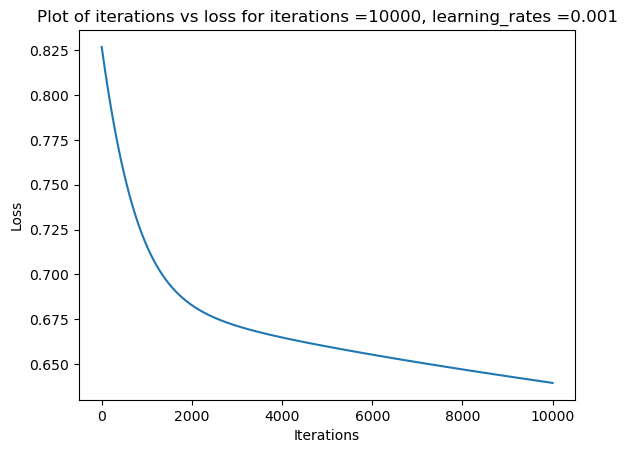

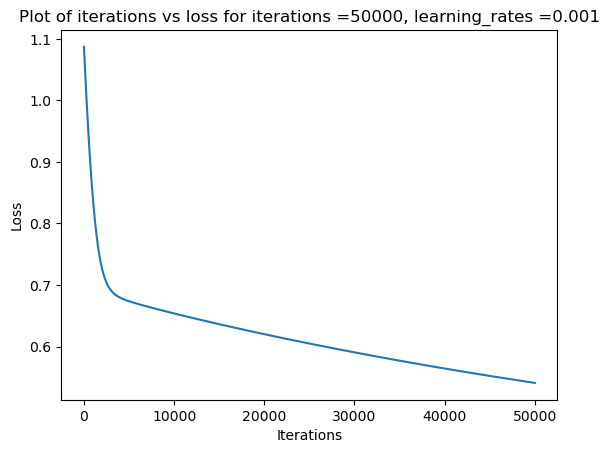

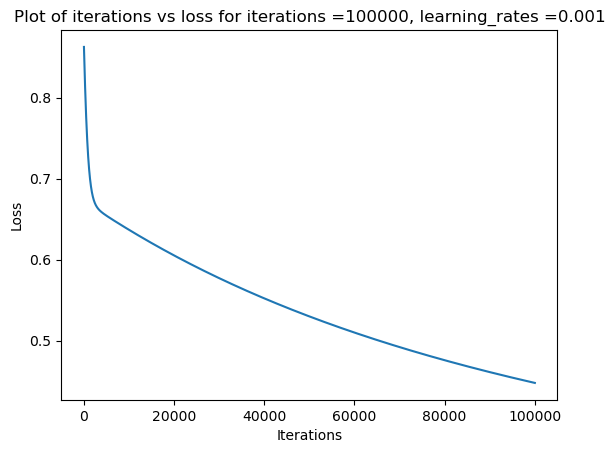

Best accuracy is : 89.55223880597015


In [19]:
# Train models with different hyperparameters
learning_rates = [ 0.001, 1e-4, 1e-3]
iterations = [10000, 50000, 100000]

# Define a list to store the accuracy of each model
accuracy_list = []

iteration_value = []
for lr in learning_rates:
    
    for it in iterations:
        
        model = LogitRegression(learning_rate=lr, iterations=it)
        model.fit(X_train, y_train)
        
        #Prediction on test dataset
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = np.mean(y_pred == y_test)
        accuracy_list.append(accuracy)
        
        #Plot model loss for each iteration
        plt.plot(model.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title(f"Plot of iterations vs loss for iterations ={it}, learning_rates ={lr}")
        plt.show()
        
        # Save the weights of the model with the highest accuracy as a pickle file
        if accuracy == max(accuracy_list):
                
            with open('model.pickle', 'wb') as file:
                pickle.dump(model, file)
            iteration_value= it
            # mp is model saved with best accuracy
            mp = model
        
# Test model and print accuracy
y_pred = mp.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Best accuracy is : {accuracy*100}")




### Calculation of correct and incorrect prediction for the model

In [20]:
# Make predictions on the test dataset
y_pred = mp.predict(X_test)

# Count the number of correct and incorrect predictions
correct = np.sum(y_pred == y_test)
incorrect = len(y_test) - correct

# Print the results
print("Correct predictions", correct)
print("Incorrect predictions", incorrect)
print("Accuracy", correct*100 / len(y_test))


Correct predictions 60
Incorrect predictions 7
Accuracy 89.55223880597015
